# Object Oriented Programming

- Classes provide means of bundling data and functionality together
- Creating a new class creates a new type of object, allowing new instances of that type to be made. 
- Each class instance can have attributes attached to it for maintaining its state. 
- Class instances can also have methods (defined by its class) for modifying its state.

In [ ]:
class ClassName:
    <statement-1>
    .
    .
    .
    .
    <statement-N>

### Class Objects

Class objects support two kinds of operations:
- instantiation
- attribute reference

*Attribute references* use the standard syntax used for all attribute references in Python: obj.name. 

In [1]:
class MyClass:
    """A simple example class"""
    i = 12345

    def f(self):
        return "Hello World"

MyClass.i and MyClass.f are valid attribute references, returning an integer and a function object.

In [2]:
MyClass.i

12345

In [3]:
MyClass.f

<function __main__.MyClass.f(self)>

In [4]:
MyClass.__doc__

'A simple example class'

Class instantiation uses function notation (function call). For example

In [6]:
x = MyClass()
x

creates a new instance of the class and assigns this object to the variable x.

- The instantiation operation (“calling” a class object) creates an empty object.
- Many classes like to create objects with instances customized to a specific initial state.
- A class may define a special method named __ init__() to define the initial state:

In [47]:
class MyClass:
    """A simple example class"""
    i = 12345

    def __init__(self): #Constructor
        self.data = ['nl']

    def f(self, item):
        self.data.append(item)
        print(self.data)
        return "Hello World"

In [49]:
x = MyClass()
x.i
y = MyClass()
y.f('world2')
#MyClass.f('bla')

['nl', 'world2']


'Hello World'

When a class defines an __ init__() method, class instantiation automatically invokes __ init__() for the newly created class instance.
For greater flexibility, arguments given to the class instantiation operator are passed on to __ init__():

In [26]:
class Complex: #x + i * y
    def __init__(self, realpart, imagpart):
        print(self)
        self.r = realpart
        self.i = imagpart

z = Complex(3.0, -4.5)
#print(z)

### Method Objects



In [65]:
class MyClass:
    """A simple example class"""
    i = 12345

    def __init__(self): #Constructor
        self.data = ['nl']

    def f(self):
        return "Hello World"

## Class and Instance Variables

- instance variables are unique to each instance and
- class variable are shared by all instances of the class 

In [83]:
class Dog:

    kind = 'canine'  # class variable

    def __init__(self, name):
        self.name = name #instance variable

d = Dog('Fido')
e = Dog('Buddy')

In [84]:
d.kind

'canine'

In [85]:
e.kind

'canine'

In [86]:
d.name

'Fido'

In [87]:
e.name

'Buddy'

shared data can have possible surprising effects with involving mutable objects such as lists and dictionaries:

In [6]:
class Dog:

    #trick = []                     #mistaken use of a class variable
    trick_set = set()

    def __init__(self, name):
        self.name = name

    def add_trick(self,trick):
        #self.trick.append(trick) 
        self.trick_set.add(trick)

d = Dog('Fido')
e = Dog('Buddy')
d.add_trick('roll over')
e.add_trick('play dead')

#d.trick_set
print(e.trick_set)

{'roll over', 'play dead'}


Correct design of the class should use an instance variable instead:

In [4]:
class Dog:


    def __init__(self, name, first_trick='first_trick'):
        self.name = name
        print('__init__ is called')
        self.trick = [first_trick]    #creates a new empty list for each dog

    def add_trick(self,trick):
        self.trick.append(trick)

d = Dog('Fido') #here I'm calling __init
e = Dog('Buddy')
d.add_trick('roll over')
e.add_trick('play dead')

d.trick
e.trick

__init__ is called
__init__ is called


['first_trick', 'play dead']

# Inheritance

There is a significant backlash against overuse of inheritance in general, because superclasses and sub classes are tightly coupled.

However, we may have to use frameworks that forces us to use inheritance sometimes. There are partical uses of multiple inheritance with the standard library and the Django web framework.

In [ ]:
class DerivedClassName(BaseClassName):
    <statments-1>
    .
    .
    .
    <statements-N>

- When the class object is constructed, the base class is remembered
- if a requested attribute is not found in the class, the search proceeds to look in the base
- Derived classes may override methods of their base classes.
- An overriding method in a derived class may in fact want to extend rather than simply replace the base class method of the same name.

In [29]:
class Rectangle:
    """A class of Python object that describes the properties of a rectangle"""
    def __init__(self, width, height, center=(0,0)):
        self.width = width
        self.height = height
        self.center = center

    def __repr__(self):
         return f"Rectangle(width={self.width}, height={self.height}, center={self.center})"

    def compute_area(self):
        return self.width * self.height

r = Rectangle(2, 4, (1,2))
r
r.compute_area()

8

In [52]:
class Square(Rectangle):
    def __init__(self, side, center=(0,0)):
        self.side = side
        #center = (1,2)
        super().__init__(side, side, center)
        #Rectangle.__init__(self, side, side, center)
    def change_center(self, t):
        self.center = t

    def __repr__(self):
        return 'hello world'
        # return f"Square(side={self.side}, center={self.center})"
    def __str__(self):
        return "string"

my_square = Square(2)
my_square.compute_area()
#my_square.change_center((22,33))
my_square
print(my_square)

string


In [42]:
class Mammals:
    def __init__(self, legs=4):
        self.legs = legs

class Dogs(Mammals):
    def __init__(self, legs=4):
        super().__init__(legs)

class Human(Mammals):
    def __init__(self, legs=2):
        super().__init__(legs)

d = Dogs()
h = Human()
d.legs
h.legs

2

## The super() Function

To override a method of a superclass, the overriding method needs to call the **corresponding method** of the superclass.

In [57]:
from collections import OrderedDict

d = OrderedDict({'a': 1, 'c':3, 'b': 2})
d.move_to_end('c')
d['a'] = 'bla'
d

OrderedDict([('a', 'bla'), ('b', 2), ('c', 3)])

In [78]:
class LastUpdateOrderedDict(OrderedDict):
    """Store items in the order the keys were last updated"""

    def __setitem__(self, key, value):
        super().__setitem__(key, value)  #Triggers when a value is set to an specific key
        #OrderedDict.__setitem__(self, key, value) # NOT RECOMMENDED.  1. the super class is hardcoded
        # 2. super() implements logic to handle class hierarchies with multiple inheritance
        self.move_to_end(key)
        #print('Item Updated')

d = LastUpdateOrderedDict({'a': 1, 'c':3, 'b': 2})
print(d)
d['a'] = 'bla'
#dir(d) #get all attributes


LastUpdateOrderedDict([('a', 1), ('c', 3), ('b', 2)])


in Python2 we had to call super with 2 arguments: Subclass and an instance of this class

In [ ]:
class LastUpdateOrderedDict(OrderedDict):
    """Store items in the order the keys were last updated"""

    def __setitem__(self, key, value):
        super(LastUpdateOrderedDict, self).__setitem__(key, value)  
        self.move_to_end(key)
        
d = LastUpdateOrderedDict({'a': 1, 'c':3, 'b': 2})

 Both arguments are optional

 Multiple Inheritance

 Any language implementing multiple inheritance needs to deal with potential naming conflicts when superclasses implement a method by the same name.
 This is called the *diamond problem*:


 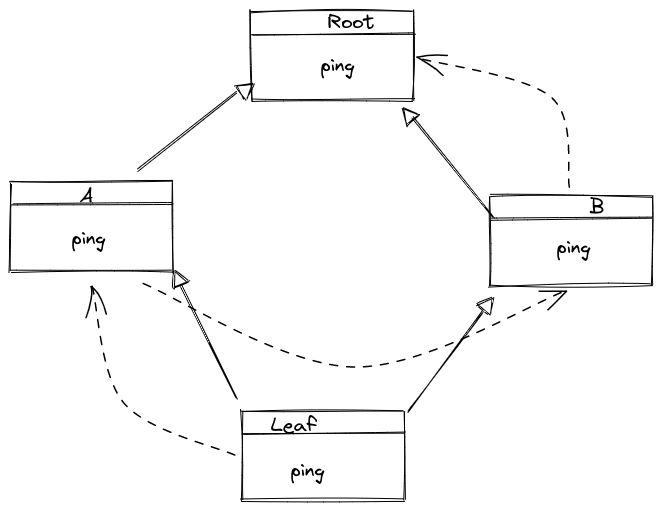

 Activation sequence (dashed arrow)



In [86]:
class Root:
    def ping(self):
        print(f"{self}.ping() in ROOT")

    def pong(self):
        print(f"{self}.pong() in ROOT")

    def __repr__(self):
        return f"INSTANCE of {type(self).__name__}"

class A(Root):
    def ping(self):
        print(f"{self}.ping() in A")
        super().ping()   # calls ping in B because B is after A in my Method Resolution Order
    
    def pong(self):
        print(f"{self}.pong() in A")
        super().pong()

    def __repr__(self):
        return f"INSTANCE of {type(self).__name__}"

class B(Root):
    def ping(self):
        print(f"{self}.ping() in B")
        super().ping()   #  calls Root, because Root comes after B in the Resolution Order 
    
    def pong(self):
        print(f"{self}.pong() in B")
    

    def __repr__(self):
        return f"INSTANCE of {type(self).__name__}"

class Leaf(A,B):    # the order of my superclasses affect my Resolution order
    def ping(self):
        print('Hello')
        #print(f"{self}.ping() in Leaf")
        #super().ping()

leaf = Leaf()
leaf.ping()
Leaf.__mro__

INSTANCE of Leaf.ping() in Leaf
INSTANCE of Leaf.ping() in B
INSTANCE of Leaf.ping() in A


(__main__.Leaf, __main__.B, __main__.A, __main__.Root, object)

In [98]:
class Grand:
    def __init__(self, a):
        self.a = a
        
    def __add__(self, other):
        return self.a + other.a

class ParentA(Grand):
    def __init__(self, a):
        self.a = a
        super().__init__(a)
        
    def __add__(self, other):
        super().__add__(other)
        return self.a + other.a

class ParentB(Grand):
    def __init__(self, a):
        self.a = a
        super().__init__(a)
        
    def __add__(self, other):
        return super().__add__(other)
        #return self.a + other.a

class Child(ParentA, ParentB):
    def __init__(self, a):
        self.a = a
        super().__init__(a)

    def __add__(self, other):
        return str(super().__add__(other)) + 'Hello world'
        # return str(self.a + other.a) + 'Hello World' 


g = Grand(1)
g2 = Grand(2)
g + g2

p1 = ParentB(1)
p2 = ParentB(2)

p1 + p2

c1 = Child(1)
c2 = Child(2)

c1 + c2

'3Hello world'

In [101]:
class Car:

    def ride(self):
        return 'riding'

    def stop(self):
        return 'stops quickly' + super().stop()

class Boat:

    def swimm(self):
        return 'swimming'

    def stop(self):
        return 'stops slowly ' + super().stop()



class Vehicle(Boat, Car):
    def ride(self):
        return 'Vehicle ' + super().ride()
    
    def stop(self):
        return 'Vehicle ' + super().stop()

    def swimm(self):
        return 'Vehicle is not ' + super().swimm()


v = Vehicle()
# print(v.ride())
print(v.stop())
# print(v.swimm())
print(Vehicle.__mro__)

AttributeError: 'super' object has no attribute 'stop'

In [127]:
class Root:
    def ping(self):
        print(f"{self}.ping() in ROOT")

    def pong(self):
        print(f"{self}.pong() in ROOT")

    def __repr__(self):
        return f"INSTANCE of {type(self).__name__}"

class A(Root):
    def ping(self):
        print(f"{self}.ping() in A")
        super().ping()   # calls ping in B because B is after A in my Method Resolution Order
    
    def pong(self):
        print(f"{self}.pong() in A")
        super().pong()

    def __repr__(self):
        return f"INSTANCE of {type(self).__name__}"

class B(Root):
    def ping(self):
        print(f"{self}.ping() in B")
        super().ping()   #  calls Root, because Root comes after B in the Resolution Order 
    
    def pong(self):
        print(f"{self}.pong() in B")
        super().pong()
    

    def __repr__(self):
        return f"INSTANCE of {type(self).__name__}"

class Leaf(A,B):    # the order of my superclasses affect my Resolution order
    def ping(self):
        print('Hello')
        #print(f"{self}.ping() in Leaf")
        #super().ping()

leaf = Leaf()
#leaf.ping()
Leaf.__mro__
leaf.pong()

INSTANCE of Leaf.pong() in A
INSTANCE of Leaf.pong() in B
INSTANCE of Leaf.pong() in ROOT


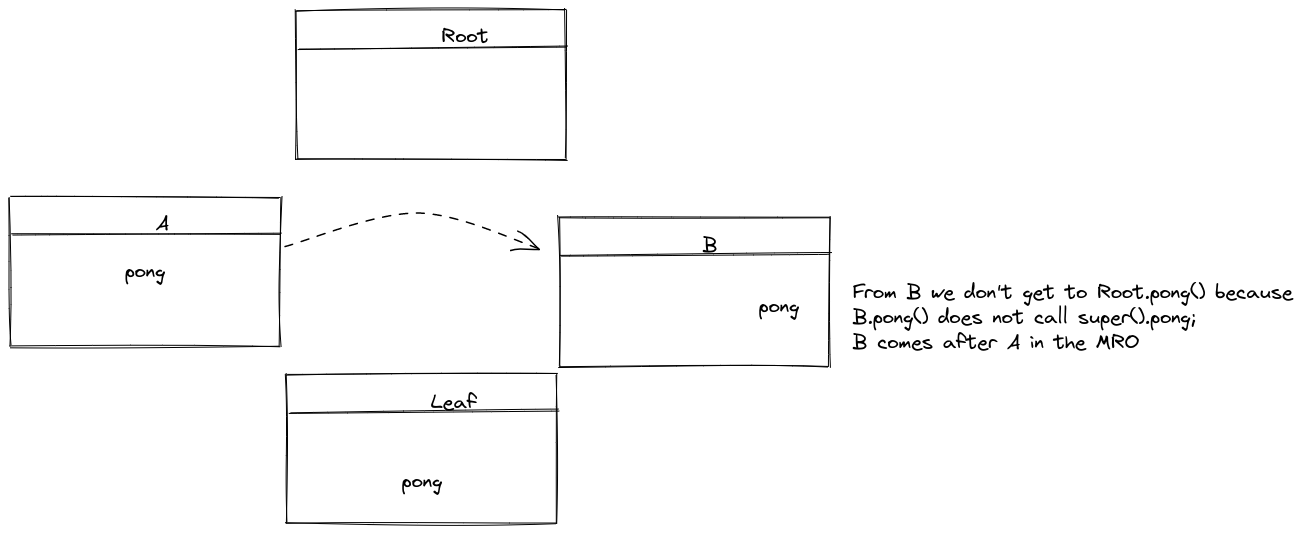

The activation sequence are determined by two factors:

- the method resolution order of the class Leaf
- the use of super() in each method

The __ mro__ attributes holds a tuple of references to the superclasses in method resolution order, from the current class all the way to the object class.

The MRO only determines the activation order, but weather a particular method will be activated in each of the classes depends on weather each implementation calls super() or not.


- When a method calls super(), it is a *cooperative method*.
- Cooperative methods enable *cooperative multiple inheritance*.
- it is recommended that every method that is overridden should call super()

THe interaction of super with the MRO is dynamic. 

In [112]:
class U:
    def ping(self):
        print(f'{self}.ping in U')
        super().ping()

    def __repr__(self):
        return f"{type(self).__name__}"

class LeafUA(A, U):
    def ping(self):
        print(f"{type(self).__name__}")
        super().ping()

u = LeafUA()
u.ping()
u = U()
u.ping()
LeafUA.__mro__
    

LeafUA
INSTANCE of LeafUA.ping() in A
INSTANCE of LeafUA.ping() in ROOT
U.ping in U


AttributeError: 'super' object has no attribute 'ping'

THe super.ping() call in LeafUA activates U.ping, which *cooparates* by calling super().ping() too, activating A.ping, and eventually Root.ping.


In a real program, a class like U could b a mixin: a class intended to be used together with other classes in multiple inheritance, to provide additional functionality.

 ## Mixin Classes

 A mixin class is designed to be subclassed together with at least one other class in multiple inheritance arrangement.

 - mixin classes are a convention with no explicit language support in Python.

In [128]:
class ReprMixin:
    def __repr__(self):
        return f"{super().__repr__() } Hello World"

import collections

class ReprDict(ReprMixin, collections.UserDict):
    pass

class ReprCounter(ReprMixin, collections.Counter):
    pass

d = ReprDict({'a':1, 'b':2})
d

c = ReprCounter([1,1,1, 3,3,3])
c

mixin = ReprMixin()
print(mixin)
ReprMixin.__mro__

#dir(object)

<__main__.ReprMixin object at 0x7f1d463f4040> Hello World


(__main__.ReprMixin, object)

## Private and "Protected" Attributes in Python

Private” instance variables that cannot be accessed except from inside an object don’t exist in Python.

- However, there is a convention that is followed by most Python code: a name prefixed with an underscore (e.g. _spam) should be treated as a non-public part of t

In [130]:
class Test:
    def __init__(self):
        self.public_var = 'Hello world'
        self._privat_var = 'You should not call me' #private

t = Test()
t.public_var
t._privat_var

'You should not call me'

 Suppose you have a Dog class that uses a *mood* instance attribute internally, without exposing it. 
 If you subclass Dog as Beagle and create your own *mood* instance attribute, you will overwrite the *mood* attribute used by the methods inherited from Dog.

 To prevent this you add 2 leading underscores.


Python  stores the name in __ dict__: *__mood*
becomes *_dog__mood*


This language feature goes by the name *name mangling*

In [156]:
class Dog:

    def jump(self):
        print('jump')
    def __init__(self):
       self.__mood = 'good'    #protected variable

dog = Dog()

dog.__dict__

{'_Dog__mood': 'good'}

In [159]:
class Beagle(Dog):

    def __init__(self):
        #Dog.__init__(self)
        super().__init__()
        self.__mood = 'Bad'

frank = Beagle()
print(frank.__dict__)

dir(object)

Dog.__mro__
print(frank._Dog__mood)



{'_Dog__mood': 'good', '_Beagle__mood': 'Bad'}
good


- Be aware *name mangling* is about safety, but not security.

The single underscore prefix has no special meaning to the Python interpreter when used in attributes names

- but it's a very strong convention among Python programmers that you should not access such attribues from outside the class.

- single _prefixed attributes are called private
- double __prefixed attributes are called "protected"

#### Further Convention

- class names are in PascalCase
- constant variables are uppercase: self.PI = 3.14
- methods are in snake_case